<a href="https://colab.research.google.com/github/ClaraLeighton/FundamentosEconom-a5816/blob/main/FPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

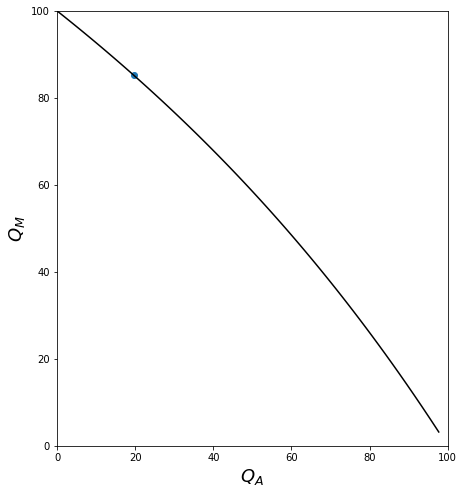

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

ALPHA = 0.3 #Costos de capital energias renovables
BETA = 0.7 #Costos de capital energias no renovables
KBAR = 100
LBAR = 100
p=1

def F(K,L,alpha=ALPHA):
    return (K**alpha)*(L**(1-alpha))

def G(K,L,beta=BETA):
    return (K**beta)*(L**(1-beta))

def budgetc(c1, p1, p2, I):
    return (I/p2)-(p1/p2)*c1

def isoq(L, Q, mu):
    return (Q/(L**(1-mu)))**(1/mu)

def edgeworth(L, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA, beta=BETA):

    a = (1-alpha)/alpha
    b = (1-beta)/beta
    return b*L*Kbar/(a*(Lbar-L)+b*L)

def edgeplot(LA, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):

    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F(KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    print("(LA,KA)=({:4.1f}, {:4.1f})  (QA, QM)=({:4.1f}, {:4.1f})  RTS={:4.1f}"
          .format(LA,KA,QA,QM,RTS))
    La = np.arange(1,Lbar)
    fig, ax = plt.subplots(figsize=(7,6))
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(La, edgeworth(La,Kbar,Lbar,alpha,beta),'k-')
    #ax.plot(La, La,'k--')
    ax.plot(La, isoq(La, QA, alpha))
    ax.plot(La, Kbar-isoq(Lbar-La, QM, beta),'g-')
    ax.plot(LA, KA,'ob')
    ax.vlines(LA,0,KA, linestyles="dashed")
    ax.hlines(KA,0,LA, linestyles="dashed")
    ax.text(-6,-6,r'$O_A$',fontsize=16)
    ax.text(Lbar,Kbar,r'$O_M$',fontsize=16)
    ax.set_xlabel(r'$L_A -- Labor$', fontsize=16)
    ax.set_ylabel('$K_A - Capital$', fontsize=16)
    #plt.show()

def ppf(LA,Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F( KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    ax.scatter(QA,QM)
    La = np.arange(0,Lbar)
    Ka = edgeworth(La, Kbar, Lbar,alpha, beta)
    Qa = F(Ka,La,alpha)
    Qm = G(Kbar-Ka,Lbar-La,beta)
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(Qa, Qm,'k-')
    ax.set_xlabel(r'$Q_A$',fontsize=18)
    ax.set_ylabel(r'$Q_M$',fontsize=18)
    plt.show()

fig, ax = plt.subplots(figsize=(7,8))
ppf(30,alpha=0.3,beta=0.7)

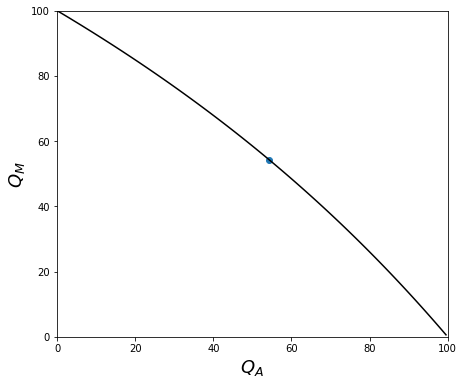

In [2]:
fig, ax = plt.subplots(figsize=(7,6))
ppf(30,alpha =0.7, beta=0.3)